In [106]:
setwd("/home/simingz/run_rasqual/datarun/NSC")

See header info [here](https://github.com/natsuhiko/rasqual/blob/master/README.md)

In [107]:
addgFDR <- function(mrestable, prestable){
    mrestable$geneFDR <- NA
    peakIDs <- unique(mrestable$V1)
    for (peakID in peakIDs) {
        tt <- max(mrestable[mrestable$V1==peakID,11])
        ttperm <- prestable[prestable$V1==peakID,3] # max test statistic for each permutation
        gfdr <- length(ttperm[ttperm > tt])/length(ttperm)
        mrestable[mrestable$V1==peakID,"geneFDR"]=gfdr
    }
    return(mrestable)
}
addgFDR_V2_getperm <- function(mrestable, prestable){
    peakIDs <- unique(mrestable$V1)
    out <- NULL
    for (peakID in peakIDs) {
        ntest <- mrestable[mrestable$V1==peakID,18][1]
        tt <- max(mrestable[mrestable$V1==peakID,11])
        preal <- pchisq(tt,df=1,lower.tail=F,log.p=F)
        ttperm <- prestable[prestable$V1==peakID,3][1] # keep only 1 permutation
        pperm <- pchisq(ttperm,df=1,lower.tail=F,log.p=F)
        out <-rbind(out,c(log(preal*ntest),log(pperm*ntest))) # bonferroni corrected p value
    }
    return(out)
}

In [ ]:
mainfall= Sys.glob( paste0("mainrun_chr*_NSC*.result.txt"))
#outmres <- NULL
outlogp <- NULL
for (mainf in mainfall){
    permf = gsub("result.txt","permres.txt",gsub("main","perm",mainf)) 
    mres <- read.table(mainf,header=F,stringsAsFactors = F, sep="\t",fill=T)
    pres <- read.table(permf,header=F,stringsAsFactors = F, sep="\t",fill=T)
    mresfl <- mres[mres$V2 != "SKIPPED",]
    if (dim(mresfl)[1]==0){next}
    #outmres<- rbind(outmres, addgFDR(mresfl,pres)) # FDR method1
    outlogp <- rbind(outlogp, addgFDR_V2_getperm(mresfl,pres))# FDR method2
} # takes 40min

In [ ]:
outmres$geneFDR2 <- NA
peakIDs <- unique(outmres$V1)
outreal <- outlogp[,1]
outperm <- outlogp[,2]
for (peakID in peakIDs){
    tt <- max(outmres[outmres$V1==peakID,11])
    p <- pchisq(tt,df=1,lower.tail=F,log.p=F)
    ntest <- outmres[outmres$V1==peakID,18][1]
    logpBon <- log(p*ntest)
    gfdr <- length(outperm[outperm < logpBon])/length(outreal[outreal < logpBon])
    outmres[outmres$V1==peakID,"geneFDR2"]=gfdr
} # takes a few hours

In [ ]:
write.table( outmres , file= "NSC_resultsFDR.txt" , row.names=F, col.names=T, sep="\t", quote = F)

In [114]:
length(unique(outmres[outmres$geneFDR2 < 0.1,]$V1))

[1] 75

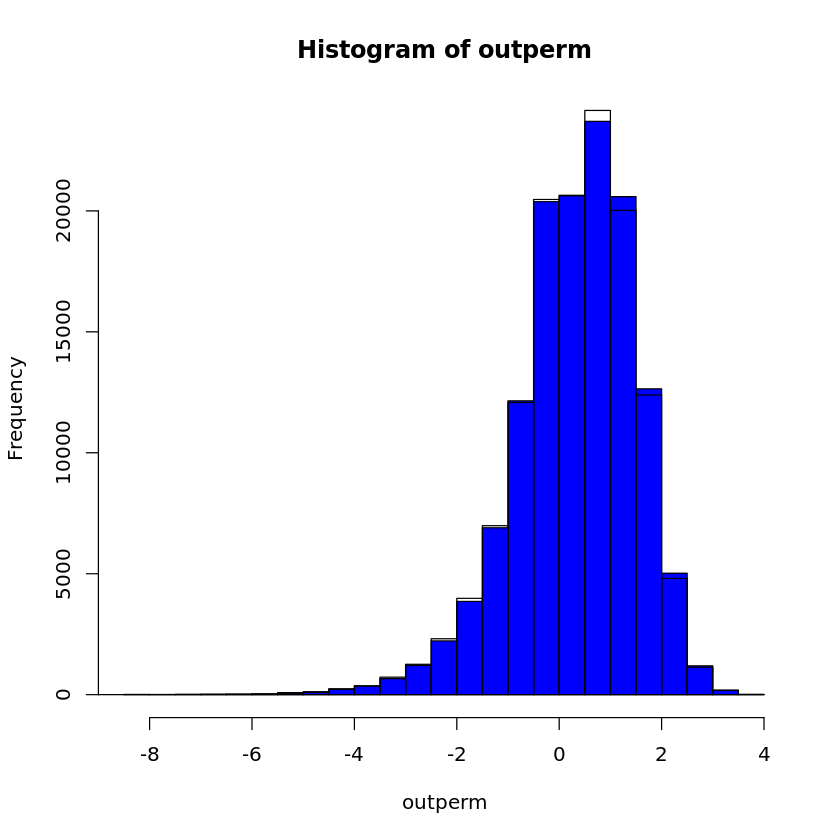

In [128]:
hist(outperm,col="blue")
hist(outreal,add=T,breaks=200)

In [121]:
ourmres$V1=="new"

[1]  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10